In [1]:
import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [2]:
import requests

firstPage = "https://squid-game.fandom.com/wikia.php?controller=DiscussionThread&method=getThreads&responseGroup=small&sortDirection=descending&sortKey=creation_date&viewableOnly=true&limit=20&pivot=4400000000000056584&page=0"

pagesToTake = 89

# wikia.php로부터 얻은 url부터 requests 모듈을 통해 json 객체를 생성합니다.
posts = []
link = firstPage
for page in range(0, pagesToTake):
    data = requests.get(link).json()
    
    threads = data["_embedded"]["threads"]
    posts += [ { "title": post["title"], "content": post["rawContent"], "time": post["creationDate"]['epochSecond'] } for post in threads ]
    link = data["_links"]["next"][0]["href"]

for post in posts:
    print("> " + post["title"])
    print(post["content"])
    print(post["time"])
    print("")

> Your favorite random player.

1666125820

> How many oaoaty players are soaoaing?

1666102566

> How good of a character is Oh Il-Nam in YOUR opinion?

1666036576

> Who is this? (#1)
Wrong answers only

1666036421

> Will Ali play Among Us with Mi-nyeo ?

1666019207

> How long will Mi-nyeo play Among Us ?

1665946298

> On a scale of 1-10, how GOOD of a character is Ali Abdul?

1665941323

> Cho Sang-woo is an

1665859653

> Cho Sang-woo is 

1665853730

> On a scale of 1-10, how bad of a character is Cho Sang-woo (1 being not bad, 10 being very bad)

1665842266

> How many times will Mi-nyeo act like 2 animals?

1665840888

> Issue (2)
Hyun-jin seems a female name too, why is 083's actor named Jang Hyun-jin???
1665821378

> Issue
I have changed Hyun Jin's image because someone accidentally added the first image when it was actually considered to be Seo Hyun-jin, here is the real one i added, i fixed it.

1665821231

> Is Seong Gi-hun an Anti-Hero?

1665697286

> On a scale of 1-10

> lychees

1641474855

> Squid Game is the best non-English movie on Netflix.

1641452731

> Did anybody finish watching Cobra Kai Season 4? 

1641446445

> haven't had this much notifs in 2 months

1641444150

> what do you think of my new roblox avatar?
Cost: 36 robux
I have gotten 37 robux by my BFF because he's the best.
https://www.roblox.com/users/2279637705/profile

1641440185

> good songs #49
This is totally a masterpiece! https://youtu.be/8ddzDa6ld3o

1641428006

> What’s 9 + 10

1641426714

> Thinking of doing some stuff here in the disc. tab, like my own squid game stuff, should i?

1641396395

> Which player is the best? (Part 4)

1641394903

> How was your morning today?

1641392078

> Magnum Chocolate ice cream
10/10 dessert, would eat this nearly every day after a meal.

1641390694

> Kang Sae-byeok fanart
I know, the mouth sucks
I drew this out of boredom sorry if the drawing is bad lol

1641390639

> who is better

1641378734

> Most favorite squid game

1641370956

>

1636163538

> You should add page about waiters
They were enough important to have their own page.
1636149702

> Guess Who pt 2 (No tags this time)

1636140304

> Who do you think should've won Squid Game based on their reason to join in the first place?

1636121416

> My mind is uhh squid game

1636099047

> How many people killed P. 101?

1636083552

> NYEH

1636083152

> the cops:
we dont care if 455 ppl dissapear every year we are fine with it
1636080517

> easiest shape to carve out in squid game

1636076191

> things you like the most in squid game

1636075623

> i put The rose of sharon has bloomes in a translator and got sharon jangmiga pieonasseupnida.
Bottom text
1636074093

> Hi guys
I know that this may be off topic, but I finished squid game already, and I’m bored, so what other tv shows should I start watching? (Something on Netflix or HBO Max please)
1636072451

> Who didnt deserve to die

1636066738

> I Simplified This Scene (Guess Who)

1636036504

> Who did you hate 

In [3]:
# 2022년 2월 이전의 게시글만 추출합니다.
result = sorted(posts, key=lambda x:x['time'])

leng = []
for i in range(len(result)):
    if result[i]['time'] < 1643677200:
        leng.append(result[i]['time'])

posts = result[:len(leng)]

In [6]:
titles = []
contents = []

for post in posts:
    titles.append(post['title'])
    contents.append(post['content'])

In [7]:
def textEditor(data):
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
    titles_punctuation = [string.translate(punctuation) for string in data]
        
    titles_fixed = []
    special = re.compile(r'[^ A-Za-z0-9+]')
    for i in titles_punctuation:
        titles_fixed.append(special.sub('',i))
        
        
    titles_tokenized = []
    for titles_token in titles_fixed:
        element = titles_token.split(" ")
        for element_token in element:
            if element_token != '':
                titles_tokenized.append(element_token.lower())
        
    stop_words = stopwords.words('english') # 불용어 로드
    titles_fixed_stopwords = [word for word in titles_tokenized if word not in stop_words] # 불용어 삭제
       
    
    title = []
    for titles in titles_fixed_stopwords:
        if len(titles) > 2:
            title.append(titles)
                
    result = []
    lemmatizer=WordNetLemmatizer()
    for word in title:
        result.append(lemmatizer.lemmatize(word))
        
    text_refined = []
    for i in result:
        text_tagged = pos_tag(word_tokenize(i))
        text_refined.append(text_tagged)
          
    text_refined2 = []
    for i in range(len(text_refined)):
        text_refined2.append(text_refined[i][0])
    return text_refined2

In [8]:
titles = textEditor(titles)

In [10]:
contents = textEditor(contents)

In [20]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

NN_stopwords = ['squid','hate', 'game', 'squidgame', 'spoiler', 'episode', 'dont','saddest', 'want', 'woudnt']
JJ_stopwords = ['english', 'ive', 'american', 'red', 'green','likely','due','second','unknown','']

def tag_wordcloud(element, tag):
    tag_list = []
    for i in element:
        if tag in i:
            tag_list.append(i[0])
    
    if tag == 'JJ':
        tag_list = [word for word in tag_list if word not in JJ_stopwords]
    elif tag == 'NN':
        tag_list = [word for word in tag_list if word not in NN_stopwords]

    count = Counter(tag_list)
    print(count)
    
    wc = WordCloud(max_words = 2000, width = 1600, height = 800)
    generate = wc.generate_from_frequencies(count)
    plt.figure(figsize=(18,18))
    plt.imshow(generate, interpolation = 'bilinear')
    wc.to_file(tag+'_fandom.png')

Counter({'new': 23, 'good': 19, 'alive': 10, 'happy': 9, 'last': 8, 'extra': 7, 'next': 6, 'special': 6, 'main': 5, 'true': 5, 'dead': 5, 'final': 5, 'many': 4, 'stupid': 3, 'wrong': 3, 'total': 3, 'great': 2, 'real': 2, 'hard': 2, 'emotional': 2, 'little': 2, 'old': 2, 'easy': 2, 'much': 2, 'former': 2, 'ultimate': 2, 'major': 2, 'visible': 1, 'underrated': 1, 'polish': 1, 'forgive': 1, 'general': 1, 'unseen': 1, 'disappointed': 1, 'live': 1, 'free': 1, 'big': 1, 'third': 1, 'daily': 1, 'angry': 1, 'impossible': 1, 'entire': 1, 'famous': 1, 'feral': 1, 'important': 1, 'injured': 1, 'bad': 1, 'black': 1, 'lucky': 1, 'surprised': 1, 'honourable': 1, 'active': 1, 'false': 1, 'unnecessary': 1, 'realistic': 1, 'nonenglish': 1, 'sensitive': 1, 'nice': 1, 'unofficial': 1, 'quiet': 1, 'full': 1})


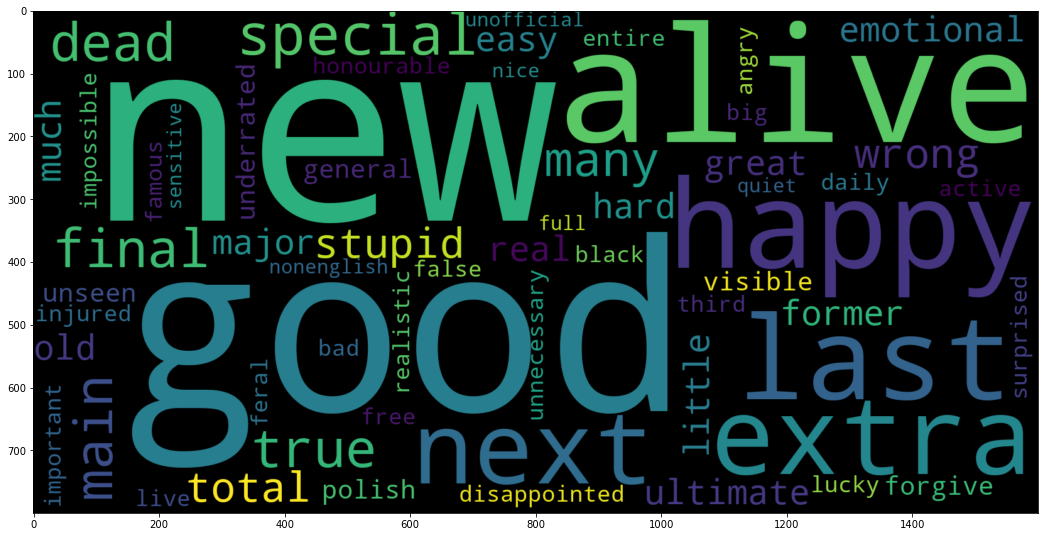

In [22]:
tag_wordcloud(titles, 'JJ')